## Dataframe and diagrams

C'est une base de donnée open source pour les régions de la france. Elle contient tout les revenus et dépenses pa année de 2012 à 2019.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("dataset.csv")
data = pd.DataFrame(data)

data.columns


Index(['year', 'reg_name', 'tax_name', 'reg_id', 'tax_id', 'amount'], dtype='object')

**Exercice 1** \
Affichez les revenus du département "Provence-Alpes-Côte d'Azur " issus de la taxe CVAE des entreprises pour toutes les \
années (si plusieurs revenus CVAE existent pour une année donnée, vous devez additionner tous les revenus CVAE de 
cette année).\
Vous devez utiliser un DataFrame Pandas.
\
Exemple:\
Provence-Alpes-Côte d'Azur  CVAE tax :\
2012 -> X euros .\
2013 -> Y euros .

In [3]:
data_Provence_Alpes_Cote_Azur = data[data["reg_name"] == "Provence-Alpes-Côte d'Azur"]

data_Provence_Alpes_Cote_Azur_CVAE = data_Provence_Alpes_Cote_Azur[data_Provence_Alpes_Cote_Azur["tax_name"] == "CVAE"]

data_Provence_Alpes_Cote_Azur_CVAE_revenu = data_Provence_Alpes_Cote_Azur_CVAE.groupby("year").agg({'amount' : 'sum'}).reset_index()

print("Provence-Alpes-Côte d'Azur CVAE tax :")

data_Provence_Alpes_Cote_Azur_CVAE_revenu

Provence-Alpes-Côte d'Azur CVAE tax :


,year,amount
0,2012,239731588.0
1,2013,258064116.0
2,2014,262012383.0
3,2015,266927276.0
4,2016,271297733.0
5,2017,563733303.0
6,2018,580056921.0
7,2019,629566622.0


**Exercice 2**\
-Affichez les pays où les Dépenses d'investissement sont supérieures à la moyenne de chaque année.\
-Affichez le nombre de region ayant les Dépenses d'investissement supérieur à la moyenne de chaque année

1) Les pays où les Dépenses d'investissement sont supérieures à la moyenne de chaque année.

In [5]:
data_Depenses_Investment = data[data["tax_name"] == "Dépenses d'investissement"]

data_Sum_By_Year_Reg = data_Depenses_Investment.groupby(["year", "reg_name"]).agg({'amount': 'sum'})

data_Mean_By_Year_Reg = data_Depenses_Investment.groupby(["year", "reg_name"]).agg({'amount': 'mean'})

data_Year_Reg = pd.merge(data_Sum_By_Year_Reg, data_Mean_By_Year_Reg, on=["year", "reg_name"], suffixes=('_sum', '_mean'))

data_Year_Reg_Sup = data_Year_Reg[data_Year_Reg['amount_sum'] > data_Year_Reg['amount_mean']]

data_Year_Reg_Sup


amount_sum   amount_mean
year reg_name                                           
2012 Auvergne-Rhône-Alpes     9.290887e+08  4.645444e+08
     Bourgogne-Franche-Comté  3.780947e+08  1.890474e+08
     Grand Est                6.576795e+08  2.192265e+08
     Hauts-de-France          8.626689e+08  4.313345e+08
     Normandie                4.437711e+08  2.218856e+08
     Nouvelle-Aquitaine       8.721770e+08  2.907257e+08
     Occitanie                8.525302e+08  4.262651e+08
2013 Auvergne-Rhône-Alpes     9.409373e+08  4.704686e+08
     Bourgogne-Franche-Comté  3.564397e+08  1.782198e+08
     Grand Est                7.950142e+08  2.650047e+08
     Hauts-de-France          9.501971e+08  4.750986e+08
     Normandie                5.393354e+08  2.696677e+08
     Nouvelle-Aquitaine       8.548478e+08  2.849493e+08
     Occitanie                9.986162e+08  4.993081e+08
2014 Auvergne-Rhône-Alpes     9.678897e+08  4.839449e+08
     Bourgogne-Franche-Comté  3.894958e+08  1.947479e+08
     Grand Est                7.183805e+08  2.394602e+08
     Hauts-de-France          9.646528e+08  4.823264e+08
     Normandie                5.055896e+08  2.527948e+08
     Nouvelle-Aquitaine       8.564934e+08  2.854978e+08
     Occitanie                9.839257e+08  4.919629e+08
2015 Auvergne-Rhône-Alpes     9.410494e+08  4.705247e+08
     Bourgogne-Franche-Comté  3.522935e+08  1.761468e+08
     Grand Est                7.407964e+08  2.469321e+08
     Hauts-de-France          1.064177e+09  5.320887e+08
     Normandie                4.262017e+08  2.131008e+08
     Nouvelle-Aquitaine       9.211050e+08  3.070350e+08
     Occitanie                1.015390e+09  5.076948e+08

2) Le nombre de region ayant les Dépenses d'investissement supérieur à la moyenne de chaque année

In [6]:
nombre_de_pays = data_Year_Reg_Sup.groupby(["year", "reg_name"]).size().reset_index(name='Nombre de Pays')

nombre_par_annee = nombre_de_pays.groupby('year')['Nombre de Pays'].sum().reset_index(name='Nombre de Pays')

nombre_par_annee


,year,Nombre de Pays
0,2012,7
1,2013,7
2,2014,7
3,2015,7


**Exercice 3** \
Faites la même chose que dans l'exercice 1, mais pour toutes les régions de France triées par les taxes pour  toutes  les années. À titre d'exemple, il s'agit d'un tableau croisé dynamique (pivot table) célèbre réalisé avec Excel

In [7]:
data_CVAE = data[data["tax_name"] == "CVAE"]

tableau_croise = pd.pivot_table(data_CVAE, values='amount', index=['reg_name', 'year', 'reg_id', 'tax_id'], columns=['tax_name'], aggfunc='sum')

tableau_croise

tax_name                                                                                                     CVAE
reg_name             year reg_id                               tax_id                                            
Auvergne-Rhône-Alpes 2012 9e540192-ace7-425f-9987-aaf5ae031274 7c85096d-d549-426d-939d-a2339f0814c6  4.555567e+08
                     2013 9e540192-ace7-425f-9987-aaf5ae031274 7c85096d-d549-426d-939d-a2339f0814c6  4.814292e+08
                     2014 9e540192-ace7-425f-9987-aaf5ae031274 7c85096d-d549-426d-939d-a2339f0814c6  4.822568e+08
                     2015 9e540192-ace7-425f-9987-aaf5ae031274 7c85096d-d549-426d-939d-a2339f0814c6  4.986351e+08
                     2016 9e540192-ace7-425f-9987-aaf5ae031274 7c85096d-d549-426d-939d-a2339f0814c6  5.065459e+08
...                                                                                                           ...
Île-de-France        2015 729fa8ca-e093-4744-83df-3481aaa9dc6d 7c85096d-d549-426d-939d-a2339f0814c6  1.363193e+09
                     2016 729fa8ca-e093-4744-83df-3481aaa9dc6d 7c85096d-d549-426d-939d-a2339f0814c6  1.372376e+09
                     2017 729fa8ca-e093-4744-83df-3481aaa9dc6d 7c85096d-d549-426d-939d-a2339f0814c6  1.514252e+09
                     2018 729fa8ca-e093-4744-83df-3481aaa9dc6d 7c85096d-d549-426d-939d-a2339f0814c6  1.490846e+09
                     2019 729fa8ca-e093-4744-83df-3481aaa9dc6d 7c85096d-d549-426d-939d-a2339f0814c6  1.692031e+09

[135 rows x 1 columns]

**Exercice 4**\
Créez un graphique pour représenter l'exercice 1.\
Vous devez utiliser la bibliothèque Python Seaborn : https://seaborn.pydata.org/tutorial/function_overview.html


/Users/jospinedorisabadassi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


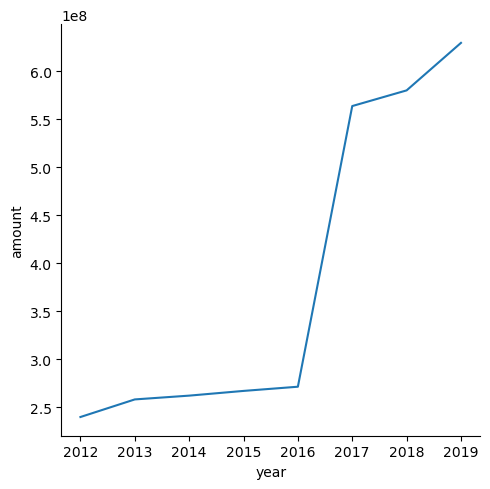

In [8]:
data_Provence_Alpes_Cote_Azur_CVAE_revenu

sns.relplot(data=data_Provence_Alpes_Cote_Azur_CVAE_revenu, x="year", y="amount", kind="line")

**Exercice 5**\
-Créez un graphique des années,les pays et Dépenses d'investissement. Affichez sur les plot les seuils montrant la moyenne des investissement de chaque année.\
-Créer un second graphique pour la question 2 de l'exercice 2.

1) Affichez sur les plot les seuils montrant la moyenne des investissement de chaque année.

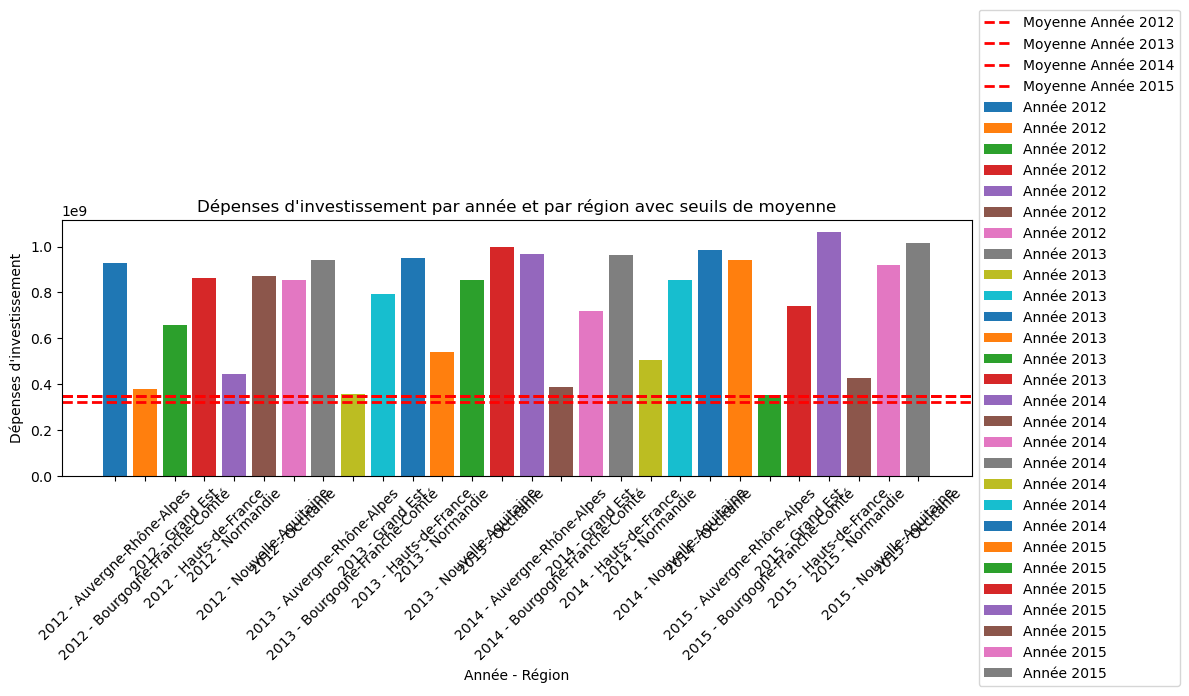

In [28]:

plt.figure(figsize=(12, 6))

for index, (annee, region) in enumerate(data_Year_Reg_Sup.groupby(['year', 'reg_name']).groups.keys()):
    
    plt.bar(f'{annee} - {region}', data_Year_Reg_Sup.loc[(annee, region), 'amount_sum'],
            label=f'Année {annee}', color=f'C{index}') 

for annee, moyenne in data_Year_Reg_Sup.groupby('year')['amount_mean'].mean().items():
    plt.axhline(y=moyenne, color='r', linestyle='--', label=f'Moyenne Année {annee:.0f}', linewidth=2)

plt.xlabel('Année - Région')
plt.ylabel("Dépenses d'investissement")
plt.title("Dépenses d'investissement par année et par région avec seuils de moyenne")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


2) Créer un second graphique pour la question 2 de l'exercice 2.

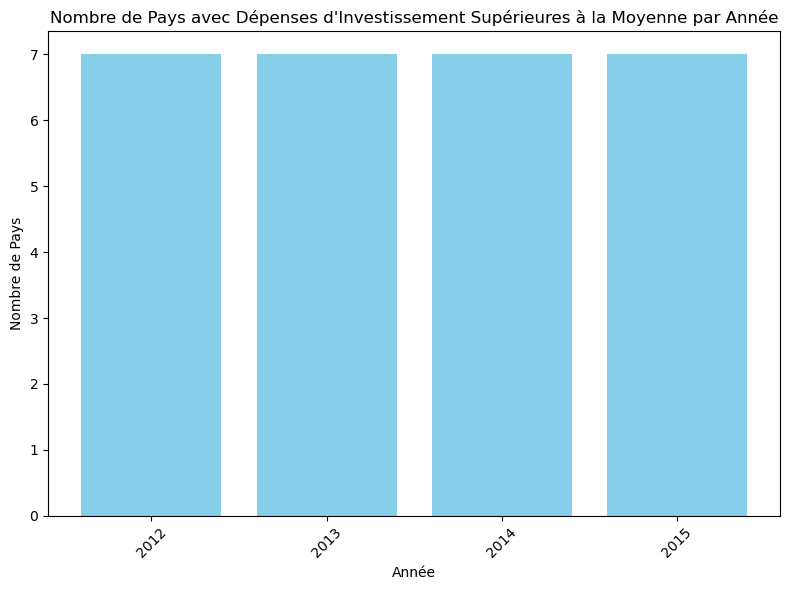

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(nombre_par_annee['year'], nombre_par_annee['Nombre de Pays'], color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre de Pays')
plt.title('Nombre de Pays avec Dépenses d\'Investissement Supérieures à la Moyenne par Année')

plt.xticks(nombre_par_annee['year'], [str(int(year)) for year in nombre_par_annee['year']], rotation=45)

plt.tight_layout()

plt.show()

**Exercice 6**\
Créez un graphique à partir de la table pivot de l'exercice 3.\
Comme il est impossible de représenter un graphique avec 3 paramètres différents, trouvez la meilleure solution pratique.